In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from ipywidgets import interact
import matplotlib.pyplot as plt
import seaborn
metadata = pd.read_excel('swiss_energy_production.xlsx', index_col=None, header=2)

In [2]:
#metadata = metadata.fillna(value=0)
metadata.head(10)

,Bois et charbon de bois,Unnamed: 1,Force hydraulique,Unnamed: 3,Ordures et déchets industriels,Unnamed: 5,Charbon,Unnamed: 7,Pétrole brut et produits pétroliers,Unnamed: 9,...,Combustibles nucléaires,Unnamed: 13,Autres énergies renouvelables,Unnamed: 15,Utilisation totale d'agents énergétiques,Unnamed: 17,"Electricité, solde import / export",Unnamed: 19,Consommation brute d’énergie dans le pays = 100%,Unnamed: 21
NaN,En TJ,Répartition en %,En TJ,Répartition en %,En TJ,Répartition en %,En TJ,Répartition en %,En TJ,Répartition en %,...,En TJ,Répartition en %,En TJ,Répartition en %,En TJ,Répartition en %,En TJ,Répartition en %,En TJ,Répartition en %
1910,17190,16.27,4500,4.26,...,...,83570,79.11,740,0.7,...,...,...,...,...,106000,100.34,-360,-0.34,105640,100
1911,17190,14.93,5400,4.69,...,...,92020,79.92,960,0.83,...,...,...,...,...,115570,100.37,-430,-0.37,115140,100
1912,17190,14.64,6120,5.21,...,...,93490,79.65,1010,0.86,...,...,...,...,...,117810,100.37,-430,-0.37,117380,100
1913,17190,14.06,6660,5.45,...,...,97890,80.04,1030,0.84,...,...,...,...,...,122770,100.38,-470,-0.38,122300,100
1914,16830,14.1,7020,5.88,...,...,95410,79.94,670,0.56,...,...,...,...,...,119930,100.49,-580,-0.49,119350,100
1915,14930,12.59,8100,6.83,...,...,96070,81.01,500,0.42,...,...,...,...,...,119600,100.85,-1010,-0.85,118590,100
1916,12590,11.15,8820,7.81,...,...,92390,81.83,180,0.16,...,...,...,...,...,113980,100.95,-1070,-0.95,112910,100
1917,13580,13.87,9720,9.93,...,...,75450,77.05,310,0.32,...,...,...,...,...,99060,101.16,-1140,-1.16,97920,100
1918,18330,18.69,10620,10.83,...,...,70020,71.38,300,0.31,...,...,...,...,...,99270,101.2,-1180,-1.2,98090,100


### Clean the Data

In [3]:
#Change the name of colums
def change_col_name(df):
    new_df = df.copy()
    cols_df = new_df.columns.values 
    prev_name = ""
    for i in range(len(cols_df)):
        name = cols_df[i]
        if(i % 2 == 0):
            prev_name = name
            new_df = new_df.rename(columns={name: prev_name + " in TJ"})
        else:
            new_df = new_df.rename(columns={name: prev_name + " in %"})
    return new_df

# check if a string is a number or not
def is_number(s):
    try:
        int(s)
        if(np.isnan(s)):
            return False
        else:
            return True
    except ValueError:
        return False

def keep_only_dates(df):
    new_df = df.copy()
    index_df = new_df.index.values
    bool_dates = []
    for i in range(len(index_df)):
        date = index_df[i]
        bool_dates.append(is_number(date))
        
    return new_df[bool_dates]
        

In [4]:
data = change_col_name(metadata)
data = keep_only_dates(data)
# We can see that we don't have unique index which is a problem
data.head()

,Bois et charbon de bois in TJ,Bois et charbon de bois in %,Force hydraulique in TJ,Force hydraulique in %,Ordures et déchets industriels in TJ,Ordures et déchets industriels in %,Charbon in TJ,Charbon in %,Pétrole brut et produits pétroliers in TJ,Pétrole brut et produits pétroliers in %,...,Combustibles nucléaires in TJ,Combustibles nucléaires in %,Autres énergies renouvelables in TJ,Autres énergies renouvelables in %,Utilisation totale d'agents énergétiques in TJ,Utilisation totale d'agents énergétiques in %,"Electricité, solde import / export in TJ","Electricité, solde import / export in %",Consommation brute d’énergie dans le pays = 100% in TJ,Consommation brute d’énergie dans le pays = 100% in %
1910,17190,16.27,4500,4.26,...,...,83570,79.11,740,0.7,...,...,...,...,...,106000,100.34,-360,-0.34,105640,100
1911,17190,14.93,5400,4.69,...,...,92020,79.92,960,0.83,...,...,...,...,...,115570,100.37,-430,-0.37,115140,100
1912,17190,14.64,6120,5.21,...,...,93490,79.65,1010,0.86,...,...,...,...,...,117810,100.37,-430,-0.37,117380,100
1913,17190,14.06,6660,5.45,...,...,97890,80.04,1030,0.84,...,...,...,...,...,122770,100.38,-470,-0.38,122300,100
1914,16830,14.1,7020,5.88,...,...,95410,79.94,670,0.56,...,...,...,...,...,119930,100.49,-580,-0.49,119350,100


Now we need to change de values where we have ... instead of 0 

In [5]:
# Check if all index are ok
data.index.is_unique

True

In [6]:
data_clean = data.apply(pd.to_numeric, errors = 'coerce').fillna(value=0)
data_clean.head(5)

,Bois et charbon de bois in TJ,Bois et charbon de bois in %,Force hydraulique in TJ,Force hydraulique in %,Ordures et déchets industriels in TJ,Ordures et déchets industriels in %,Charbon in TJ,Charbon in %,Pétrole brut et produits pétroliers in TJ,Pétrole brut et produits pétroliers in %,...,Combustibles nucléaires in TJ,Combustibles nucléaires in %,Autres énergies renouvelables in TJ,Autres énergies renouvelables in %,Utilisation totale d'agents énergétiques in TJ,Utilisation totale d'agents énergétiques in %,"Electricité, solde import / export in TJ","Electricité, solde import / export in %",Consommation brute d’énergie dans le pays = 100% in TJ,Consommation brute d’énergie dans le pays = 100% in %
1910,17190,16.27,4500,4.26,0.0,0.0,83570,79.11,740,0.70,...,0.0,0.0,0.0,0.0,106000,100.34,-360,-0.34,105640,100
1911,17190,14.93,5400,4.69,0.0,0.0,92020,79.92,960,0.83,...,0.0,0.0,0.0,0.0,115570,100.37,-430,-0.37,115140,100
1912,17190,14.64,6120,5.21,0.0,0.0,93490,79.65,1010,0.86,...,0.0,0.0,0.0,0.0,117810,100.37,-430,-0.37,117380,100
1913,17190,14.06,6660,5.45,0.0,0.0,97890,80.04,1030,0.84,...,0.0,0.0,0.0,0.0,122770,100.38,-470,-0.38,122300,100
1914,16830,14.10,7020,5.88,0.0,0.0,95410,79.94,670,0.56,...,0.0,0.0,0.0,0.0,119930,100.49,-580,-0.49,119350,100


We can see that we have a column "Consommation brute d’énergie dans le pays = 100% in %" which is always equal to 100% and it's the same thing for "Utilisation totale d'agents énergétiques in %"... so it's not very interesting for us. <br> 
Futhermore the "Consommation brute d’énergie dans le pays = 100% in TJ" is the same thing as "Utilisation totale d'agents énergétiques in TJ". So we will delete one and rename the other because it's a little bit ambiguous.

In [7]:
data_clean_drop = data_clean.drop(['Consommation brute d’énergie dans le pays = 100% in %'], axis=1).drop(['Utilisation totale d\'agents énergétiques in %'], axis=1).drop(['Utilisation totale d\'agents énergétiques in TJ'], axis=1)
final_data_clean = data_clean_drop.rename(columns={"Consommation brute d’énergie dans le pays = 100% in TJ": "Consommation brute d’énergie dans le pays in TJ"})
final_data_clean.head()

,Bois et charbon de bois in TJ,Bois et charbon de bois in %,Force hydraulique in TJ,Force hydraulique in %,Ordures et déchets industriels in TJ,Ordures et déchets industriels in %,Charbon in TJ,Charbon in %,Pétrole brut et produits pétroliers in TJ,Pétrole brut et produits pétroliers in %,Gaz in TJ,Gaz in %,Combustibles nucléaires in TJ,Combustibles nucléaires in %,Autres énergies renouvelables in TJ,Autres énergies renouvelables in %,"Electricité, solde import / export in TJ","Electricité, solde import / export in %",Consommation brute d’énergie dans le pays in TJ
1910,17190,16.27,4500,4.26,0.0,0.0,83570,79.11,740,0.70,0.0,0.0,0.0,0.0,0.0,0.0,-360,-0.34,105640
1911,17190,14.93,5400,4.69,0.0,0.0,92020,79.92,960,0.83,0.0,0.0,0.0,0.0,0.0,0.0,-430,-0.37,115140
1912,17190,14.64,6120,5.21,0.0,0.0,93490,79.65,1010,0.86,0.0,0.0,0.0,0.0,0.0,0.0,-430,-0.37,117380
1913,17190,14.06,6660,5.45,0.0,0.0,97890,80.04,1030,0.84,0.0,0.0,0.0,0.0,0.0,0.0,-470,-0.38,122300
1914,16830,14.10,7020,5.88,0.0,0.0,95410,79.94,670,0.56,0.0,0.0,0.0,0.0,0.0,0.0,-580,-0.49,119350


In [8]:
# Check one
final_data_clean["Ordures et déchets industriels in %"].head(5)

1910    0.0
1911    0.0
1912    0.0
1913    0.0
1914    0.0
Name: Ordures et déchets industriels in %, dtype: float64

Now that we have this, we can separate our datafram into 2 differents. Why? So we can have one with only with Tera-joules and one with only the percentage

In [9]:
def countains_str(df, str_):
    new_df = df.copy()
    index_df = new_df.columns.values
    names = []
    for i in range(len(index_df)):
        col_name = index_df[i]
        if str_ in col_name: 
            names.append(col_name)
    return new_df[names]

In [10]:
final_data_tj = countains_str(final_data_clean, "TJ")
final_data_tj.head()

,Bois et charbon de bois in TJ,Force hydraulique in TJ,Ordures et déchets industriels in TJ,Charbon in TJ,Pétrole brut et produits pétroliers in TJ,Gaz in TJ,Combustibles nucléaires in TJ,Autres énergies renouvelables in TJ,"Electricité, solde import / export in TJ",Consommation brute d’énergie dans le pays in TJ
1910,17190,4500,0.0,83570,740,0.0,0.0,0.0,-360,105640
1911,17190,5400,0.0,92020,960,0.0,0.0,0.0,-430,115140
1912,17190,6120,0.0,93490,1010,0.0,0.0,0.0,-430,117380
1913,17190,6660,0.0,97890,1030,0.0,0.0,0.0,-470,122300
1914,16830,7020,0.0,95410,670,0.0,0.0,0.0,-580,119350


In [11]:
final_data_perc = countains_str(final_data_clean, "%")
final_data_perc.head()

,Bois et charbon de bois in %,Force hydraulique in %,Ordures et déchets industriels in %,Charbon in %,Pétrole brut et produits pétroliers in %,Gaz in %,Combustibles nucléaires in %,Autres énergies renouvelables in %,"Electricité, solde import / export in %"
1910,16.27,4.26,0.0,79.11,0.70,0.0,0.0,0.0,-0.34
1911,14.93,4.69,0.0,79.92,0.83,0.0,0.0,0.0,-0.37
1912,14.64,5.21,0.0,79.65,0.86,0.0,0.0,0.0,-0.37
1913,14.06,5.45,0.0,80.04,0.84,0.0,0.0,0.0,-0.38
1914,14.10,5.88,0.0,79.94,0.56,0.0,0.0,0.0,-0.49


### Energy Production

First we will see by year the evolution of the enery production in Switzerland

In [12]:
# to plot a datafram with many colors
def plot_df(df, title):
    seaborn.set_palette("Set1")
    #seaborn.set_palette("muted")
    seaborn.set_context("notebook")
    figure, axes = plt.subplots(1, 1, figsize=(20,10))
    result = seaborn.barplot(df.index, df, ax=axes)
    result.set_xticklabels(df.index, rotation=90)
    result.set_title(title, fontsize=14, fontweight="bold")
    
    return result

def interaction_date_bar_tj(value):
    %matplotlib inline
    new_df= final_data_tj.loc[value]
    return plot_df(new_df, value)

def interaction_date_bar_perc(value):
    %matplotlib inline
    new_df= final_data_perc.loc[value]
    return plot_df(new_df, value)

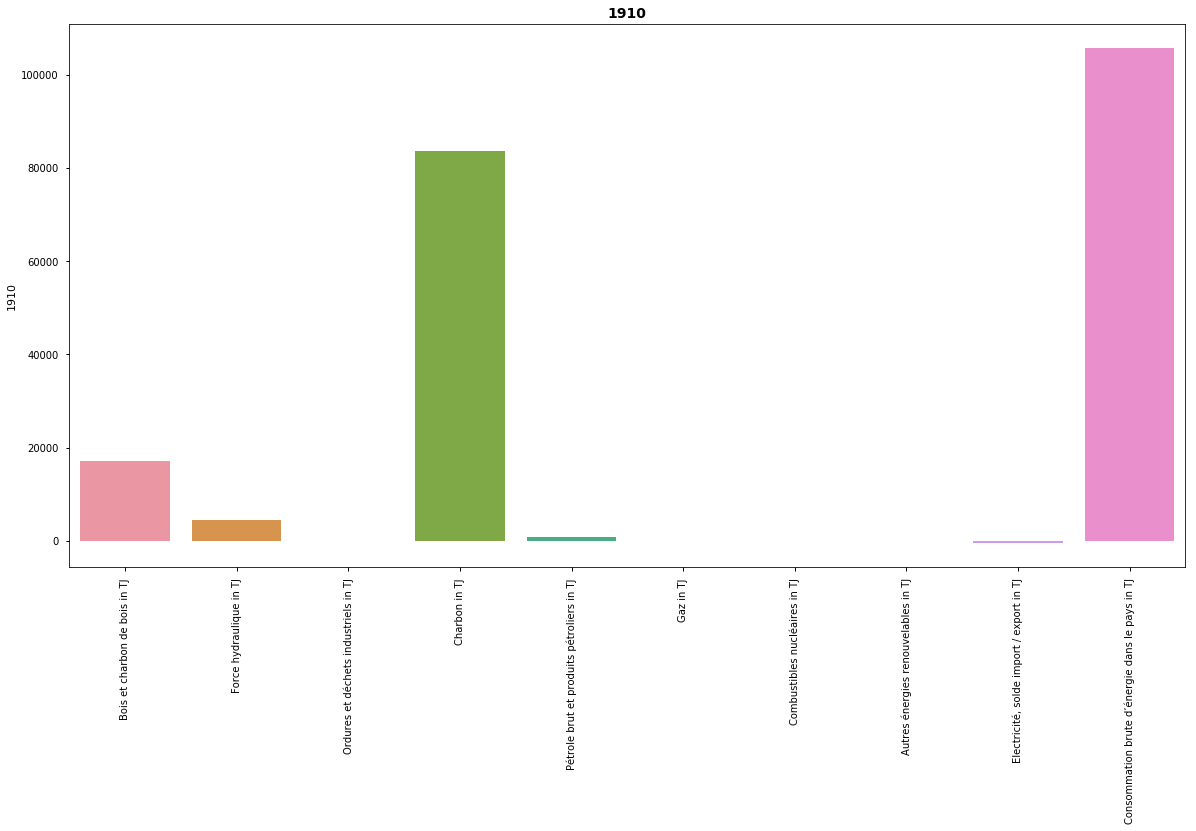

In [13]:
dates = final_data_tj.index.values
interact(interaction_date_bar_tj, value = list(dates));

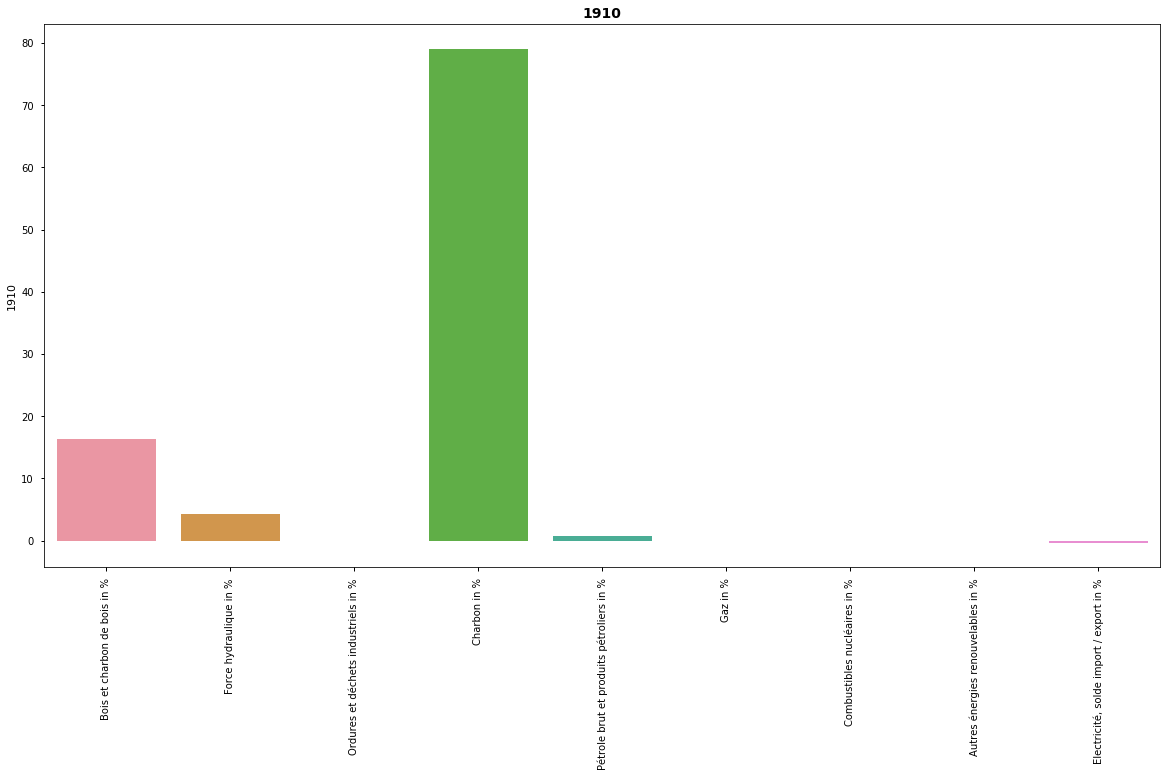

In [14]:
dates = final_data_perc.index.values
interact(interaction_date_bar_perc, value = list(dates));

Now, we will do the same thing for all the categories. To do so we can juste transpose our dataframe and reuse the same functions

In [15]:
final_data_tj_trans = final_data_tj.transpose()
final_data_tj_trans.head()

,1910,1911,1912,1913,1914,1915,1916,1917,1918,1919,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Bois et charbon de bois in TJ,17190.0,17190.0,17190.0,17190.0,16830.0,14930.0,12590.0,13580.0,18330.0,19750.0,...,31880.0,32320.0,31450.0,35590.0,37120.0,40000.0,35910.0,40380.0,44370.0,38500.0
Force hydraulique in TJ,4500.0,5400.0,6120.0,6660.0,7020.0,8100.0,8820.0,9720.0,10620.0,10440.0,...,117930.0,117210.0,130940.0,135210.0,133690.0,134820.0,121660.0,143660.0,142460.0,141510.0
Ordures et déchets industriels in TJ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,51260.0,55090.0,55260.0,54800.0,52910.0,54640.0,55480.0,56390.0,54830.0,56880.0
Charbon in TJ,83570.0,92020.0,93490.0,97890.0,95410.0,96070.0,92390.0,75450.0,70020.0,53180.0,...,6040.0,6520.0,7300.0,6560.0,6190.0,6210.0,5840.0,5270.0,5670.0,5910.0
Pétrole brut et produits pétroliers in TJ,740.0,960.0,1010.0,1030.0,670.0,500.0,180.0,310.0,300.0,640.0,...,533330.0,532310.0,508420.0,525990.0,512710.0,523490.0,485280.0,494270.0,503880.0,462560.0


In [16]:
def interaction_date_bar_tj_trans(value):
    %matplotlib inline
    new_df= final_data_tj_trans.loc[value]
    return plot_df(new_df, value)

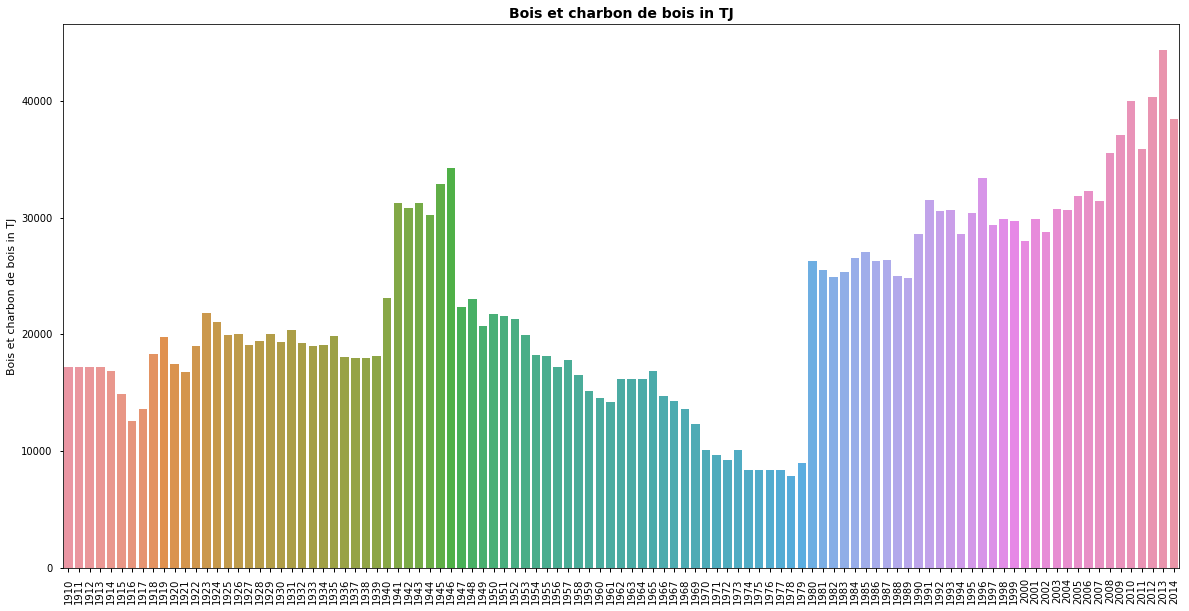

In [17]:
dates = final_data_tj_trans.index.values
interact(interaction_date_bar_tj_trans, value = list(dates));

In [18]:
final_data_perc_trans = final_data_perc.transpose()
final_data_tj_trans.head()

,1910,1911,1912,1913,1914,1915,1916,1917,1918,1919,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Bois et charbon de bois in TJ,17190.0,17190.0,17190.0,17190.0,16830.0,14930.0,12590.0,13580.0,18330.0,19750.0,...,31880.0,32320.0,31450.0,35590.0,37120.0,40000.0,35910.0,40380.0,44370.0,38500.0
Force hydraulique in TJ,4500.0,5400.0,6120.0,6660.0,7020.0,8100.0,8820.0,9720.0,10620.0,10440.0,...,117930.0,117210.0,130940.0,135210.0,133690.0,134820.0,121660.0,143660.0,142460.0,141510.0
Ordures et déchets industriels in TJ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,51260.0,55090.0,55260.0,54800.0,52910.0,54640.0,55480.0,56390.0,54830.0,56880.0
Charbon in TJ,83570.0,92020.0,93490.0,97890.0,95410.0,96070.0,92390.0,75450.0,70020.0,53180.0,...,6040.0,6520.0,7300.0,6560.0,6190.0,6210.0,5840.0,5270.0,5670.0,5910.0
Pétrole brut et produits pétroliers in TJ,740.0,960.0,1010.0,1030.0,670.0,500.0,180.0,310.0,300.0,640.0,...,533330.0,532310.0,508420.0,525990.0,512710.0,523490.0,485280.0,494270.0,503880.0,462560.0


In [19]:
def interaction_date_bar_perc_trans(value):
    %matplotlib inline
    new_df= final_data_tj_trans.loc[value]
    return plot_df(new_df, value)

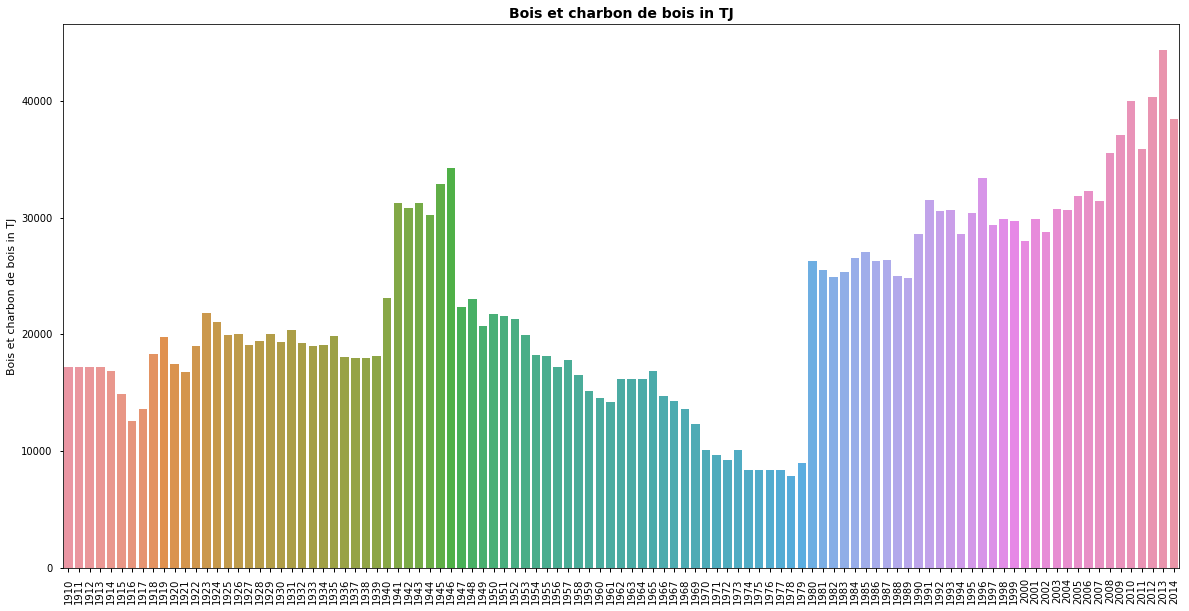

In [20]:
dates = final_data_tj_trans.index.values
interact(interaction_date_bar_perc_trans, value = list(dates));

OK but i think that there is a way to to this without redefining a function everytime ........ TO DO
And TO DO (add others data?? not many...)

In [72]:
electrical_production_df = pd.read_csv('ProductionElectrique.csv', encoding='Windows-1252')
nuclear_production_df = pd.read_csv('ProductionNucléaireParCentrale.csv',encoding="EUC-JP")

In [73]:
electrical_production_df.head()

,num,Jahr,Kraftwerkstyp
0,31273,1970,Wasserkraftwerke
1,1850,1970,Kernkraftwerke
2,1763,1970,Konventionell thermische Kraftwerke
3,"""...""",1970,Diverse Erneuerbare
4,34886,1970,Bruttoerzeugung


In [74]:
from googletrans import Translator
translator = Translator()
a = translator.translate("bonjour")
a.text

'Hello'

In [ ]:
def trad1(row):
    load_factor = "Arbeitsausnutzung in %"
    if str(row) == load_factor:
        return "Load factor in %"
        print(row)
    else:
        return "Electricity generation in GWh"
def trad2(row):
    if str(row) == "Mニ_hleberg":
        return "Mühleberg"
    elif str(row) == "Gニ_sgen":
        return "Gösgen"
    elif str(row) == "Kernkraftwerke - Total":
        return "Nuclear Plant - Total"
    else:
        return str(row)

def change_col_name_electrical(df):
    translator = Translator()
    new_df = df.copy()
    new_df = new_df.rename(columns={"Jahr": "Year"})
    new_df = new_df.rename(columns={"Kraftwerkstyp": "Type of power plant"})
    new_df['Type of power plant'] = new_df["Type of power plant"].apply(lambda row: translator.translate(row).text)
    return new_df

def change_col_name_nuclear(df): 
    new_df = df.copy()
    new_df = new_df.rename(columns={"Jahr": "Year"})
    new_df = new_df.rename(columns={"Erzeugung/ Arbeitsausnutzung": "Production / work utilization"})
    new_df = new_df.rename(columns={"Kernkraftwerk": "name"})
    new_df['Production / work utilization'] = new_df['Production / work utilization'].apply(lambda row: trad1(row))
    new_df['name'] = new_df['name'].apply(lambda row: trad2(row))
    return new_df

In [ ]:
electrical_production_df_cleaned = change_col_name_electrical(electrical_production_df);

In [ ]:
electrical_production_df_cleaned.head()

In [92]:
nuclear_production_df.head()

,num,Jahr,Kernkraftwerk,Erzeugung/ Arbeitsausnutzung
0,22298.0,1990,Kernkraftwerke - Total,Elektrizitニ_tserzeugung in GWh
1,86.6,1990,Kernkraftwerke - Total,Arbeitsausnutzung in %
2,2540.0,1990,Beznau I,Elektrizitニ_tserzeugung in GWh
3,83.3,1990,Beznau I,Arbeitsausnutzung in %
4,2617.0,1990,Beznau II,Elektrizitニ_tserzeugung in GWh


In [114]:
nuclear_production_df_cleaned = change_col_name_nuclear(nuclear_production_df)
nuclear_production_df_cleaned

,num,Year,name,Production / work utilization
0,22298.0,1990,Nuclear Plant - Total,Electricity generation in GWh
1,86.6,1990,Nuclear Plant - Total,Load factor in %
2,2540.0,1990,None,Electricity generation in GWh
3,83.3,1990,None,Load factor in %
4,2617.0,1990,None,Electricity generation in GWh
5,85.5,1990,None,Load factor in %
6,2489.0,1990,Mühleberg,Electricity generation in GWh
7,88.8,1990,Mühleberg,Load factor in %
8,7080.0,1990,Gösgen,Electricity generation in GWh
9,86.7,1990,Gösgen,Load factor in %
